<a href="https://colab.research.google.com/github/Indian-otaku/Miscellaneous_python_programs/blob/main/bfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BFS Graph Traversal program

### Algorithm:
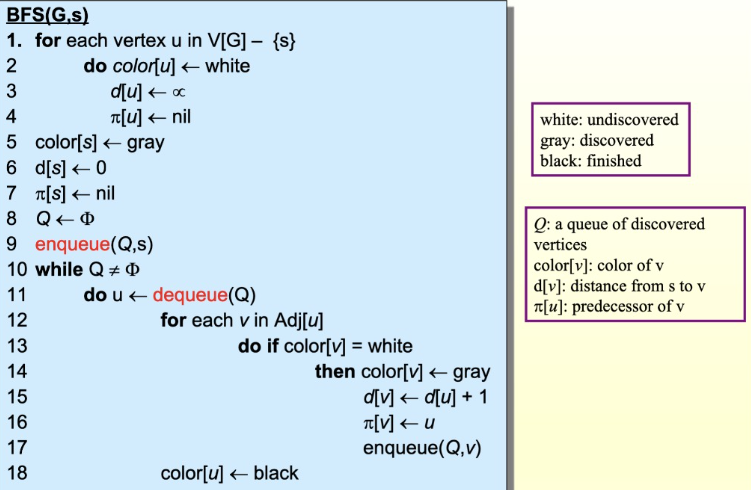

### 3 Colors in the algorithm represents the following: 

Initially, all nodes are unvisited. After visiting a node for the first time, it becomes discovered.

A node is complete if all of its adjacent nodes have been visited.

Thus, all the adjacent nodes of a complete node are either discovered or complete.

Generally, three different colors i.e., white, gray and black are used to represent unvisited, discovered and complete respectively.

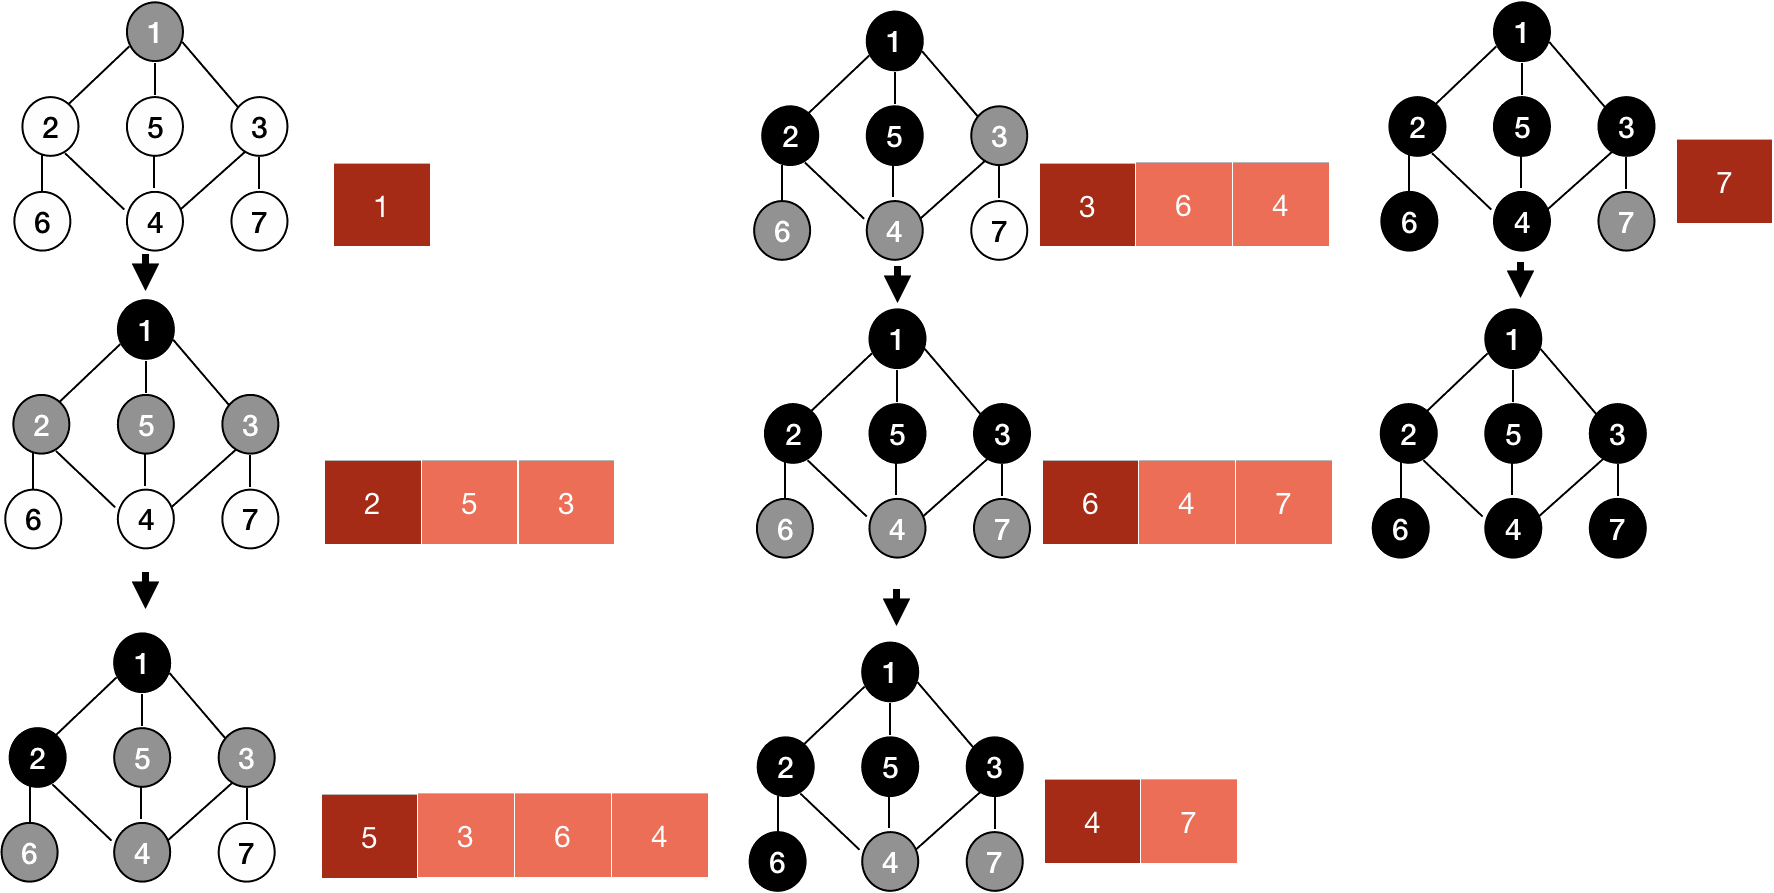

In [57]:
import numpy as np

class Graph:
    def __init__(self, n_vertices, n_edges):
        self.n_vertices = n_vertices
        self.n_edges = n_edges
    
    def __str__(self):
        return str(self.adj_matrix.tolist())
    
    def make_graph(self):
        self.adj_matrix = np.zeros(shape=(self.n_vertices, self.n_vertices),
                                  dtype=np.int16) 
        graph_type = input("Enter the type of graph (Directed [D] or Undirected [U]): ")             
        for i in range(self.n_edges):
            row, col = eval(input("Enter the edge: "))
            if (graph_type == "D"):
                self.adj_matrix[row, col] = 1
            elif (graph_type == "U"):
                self.adj_matrix[row, col] = 1
                self.adj_matrix[col, row] = 1
            else:
                print("Enter a valid type of graph")
                exit()
    
    def adj_vertices(self, vertice):
        adj_vertices = []
        for adj_vertice, val in enumerate(self.adj_matrix[vertice]):
            if (val == 1):
                adj_vertices.append(adj_vertice)
        return adj_vertices
    
def enqueue(queue, val):
    queue.append(val)

def dequeue(queue):
    if (len(queue) < 1):
        return None
    return queue.pop(0)

In [58]:
graph = Graph(6, 8)
graph.make_graph()

Enter the type of graph (Directed [D] or Undirected [U]): D
Enter the edge: 0,1
Enter the edge: 0,3
Enter the edge: 3,1
Enter the edge: 4,3
Enter the edge: 1,4
Enter the edge: 2,4
Enter the edge: 2,5
Enter the edge: 5,5


In [59]:
graph.adj_matrix

array([[0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1]], dtype=int16)

In [60]:
graph.adj_vertices(4)

[3]

In [61]:
def bfs(graph, source_node):
    color = np.zeros(graph.n_vertices, dtype=np.int16).tolist()
    d = color.copy()
    p = color.copy()
    for u in range(graph.n_vertices):
        color[u] = "WHITE" 
        d[u] = -1
        p[u] = None
    color[source_node] = "GRAY"
    d[source_node] = 0
    queue = []
    enqueue(queue, source_node)
    while (len(queue) != 0):
        u = dequeue(queue)
        for v in graph.adj_vertices(u):
            if color[v] == "WHITE":
                color[v] = "GRAY"
                d[v] = d[u] + 1
                p[v] = u
                enqueue(queue, v)
        color[u] = "BLACK"
        print(f"{u}->", end="")
    print()
    return {"Graph":graph,
            "Source":source_node,
            "Color":color,
            "Distance":d, 
            "Predecessor":p}

In [66]:
result = bfs(graph, 2)
result

2->4->5->3->1->


{'Graph': <__main__.Graph at 0x7f17258812e0>,
 'Source': 2,
 'Color': ['WHITE', 'BLACK', 'BLACK', 'BLACK', 'BLACK', 'BLACK'],
 'Distance': [-1, 3, 0, 2, 1, 1],
 'Predecessor': [None, 3, None, 4, 2, 2]}